In [1]:
%cd ..
%pip install -e .

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
Obtaining file:///home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.1.0
    Uninstalling src-0.1.0:
      Successfully uninstalled src-0.1.0
  Running setup.py develop for src
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['patch.edgecolor'] = 'black'
plt.rcParams['patch.linewidth'] = 2


In [3]:
df = pd.read_csv('reports/figures/fig2c_alt.csv')


In [4]:
df

,Unnamed: 0,model,reg,seed,mu,train_acc,val_acc,test_acc
0,0,gcn,lap_loss,0,0.0,0.9929,0.794,0.803
1,1,gcn,lap_loss,0,0.1,0.9929,0.650,0.675
2,2,gcn,lap_loss,0,0.2,0.9929,0.610,0.621
3,3,gcn,lap_loss,0,0.3,0.9929,0.608,0.600
4,4,gcn,lap_loss,0,0.4,0.9929,0.588,0.577
...,...,...,...,...,...,...,...,...
175,175,mlp,preg_loss,4,0.4,1.0000,0.318,0.344
176,176,mlp,preg_loss,4,0.5,1.0000,0.320,0.344
177,177,mlp,preg_loss,4,0.6,1.0000,0.320,0.342
178,178,mlp,preg_loss,4,0.7,1.0000,0.320,0.341


In [5]:
df

,Unnamed: 0,model,reg,seed,mu,train_acc,val_acc,test_acc
0,0,gcn,lap_loss,0,0.0,0.9929,0.794,0.803
1,1,gcn,lap_loss,0,0.1,0.9929,0.650,0.675
2,2,gcn,lap_loss,0,0.2,0.9929,0.610,0.621
3,3,gcn,lap_loss,0,0.3,0.9929,0.608,0.600
4,4,gcn,lap_loss,0,0.4,0.9929,0.588,0.577
...,...,...,...,...,...,...,...,...
175,175,mlp,preg_loss,4,0.4,1.0000,0.318,0.344
176,176,mlp,preg_loss,4,0.5,1.0000,0.320,0.344
177,177,mlp,preg_loss,4,0.6,1.0000,0.320,0.342
178,178,mlp,preg_loss,4,0.7,1.0000,0.320,0.341


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


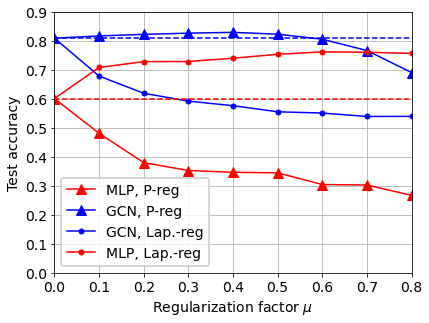

In [8]:
#fig2c
df = pd.read_csv('reports/figures/fig2c_alt.csv')
df = df.groupby(by=['model', 'reg', 'mu'], as_index=False).mean()
stds = df.groupby(by=['model', 'reg', 'mu'], as_index=False).std()

fig, ax = plt.subplots(figsize=(6.4,4.8))


filt = (df['model'] == 'mlp') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-^r', label='MLP, P-reg', ms=10)

filt = (df['model'] == 'gcn') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-^b', label='GCN, P-reg', ms=10)

filt = (df['model'] == 'gcn') & (df['reg'] == 'lap_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-ob', label='GCN, Lap.-reg', ms=5)

filt = (df['model'] == 'gcn') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], 9*[df[filt]['test_acc'][df[filt]['mu']==0]], '--b')

filt = (df['model'] == 'mlp') & (df['reg'] == 'lap_loss')
ax.plot(df[filt]['mu'], df[filt]['test_acc'], '-or', label='MLP, Lap.-reg', ms=5)

filt = (df['model'] == 'mlp') & (df['reg'] == 'preg_loss')
ax.plot(df[filt]['mu'], 9*[df[filt]['test_acc'][df[filt]['mu']==0]], '--r')



ax.set(xlim=(0, .8), ylim=(0, .9), xlabel='Regularization factor $\mu$', ylabel='Test accuracy')
ax.legend(loc='lower left')
ax.grid(True)
plt.savefig('reports/figures/fig2c_alt.eps', format='eps')
plt.savefig('reports/figures/slide_mu/5.png', dpi=300)
plt.show()